<a href="https://colab.research.google.com/github/Mousaabdi/Chess-move/blob/main/exam2_mousa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import copy
##Define empty grid (any size is okay)
grid=[[0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0]]
#or
N=8
grid=np.zeros([N,N],dtype=int)
grid=grid.tolist()

In [ ]:
def possible(grid,y,x): #is it possible to place a queen into y,x?

    l=len(grid) #how big is our grid?
    
    for i in range(l): #check for queens on row y
        if grid[y][i]==1: #if exist return false
            return False
    for i in range(l):  #check for queens on column x
        if grid[i][x]==1: #if exists return 0
            return False
        
    for i in range(l): #loop through all rows
        for j in range(l): #and columns
            if grid[i][j]==1: #if there is a queen
                if abs(i - y) == abs(j - x): #and if there is another on a diagonal
                    return False #return false
    return True #if every check clears, we can return true

In [ ]:
def solve(grid):
    
    l=len(grid) #length of our grid  
    
    for y in range(l): #for every row
        for x in range(l): #for every column
            if grid[y][x]==0: # we can place if there is no queen in given position
                if possible(grid,y,x): #if empty, check if we can place a queen
                    grid[y][x]=1 #if we can, then place it
                    solve(grid) #pass grid for recursive solution
                    #if we end up here, means we searched through all children branches
                    if sum(sum(a) for a in grid)==l: #if there are 8 queens
                        return grid #we are successful so return
                    grid[y][x]=0 #remove the previous placed queen


    return grid #means we searched the space, we can return our result

In [ ]:
Solution = solve(copy.deepcopy(grid)) #get the solution
print(np.matrix(Solution)) #Print the solution

[[1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]


In [ ]:
def plot(grid):# Plot the solution on a chessboard
    import seaborn as sns
    import matplotlib.pyplot as plt
    import string
    
    l=len(grid)
    Ly=list(range(1,l+1))[::-1]
    ly = [str(i) for i in Ly]
    Lx=list(string.ascii_uppercase)
    lx=Lx[:l]
    
    plt.close('all')
    sns.set(font_scale = 2)
    plt.figure(figsize=(10,10))
    ax = plt.gca() #you first need to get the axis handle
    ax.set_aspect(1)
    sns.heatmap(Solution,linewidths=.8,cbar=False,linecolor='blue',
                cmap='Reds',center=0.4,xticklabels=lx,yticklabels=ly)

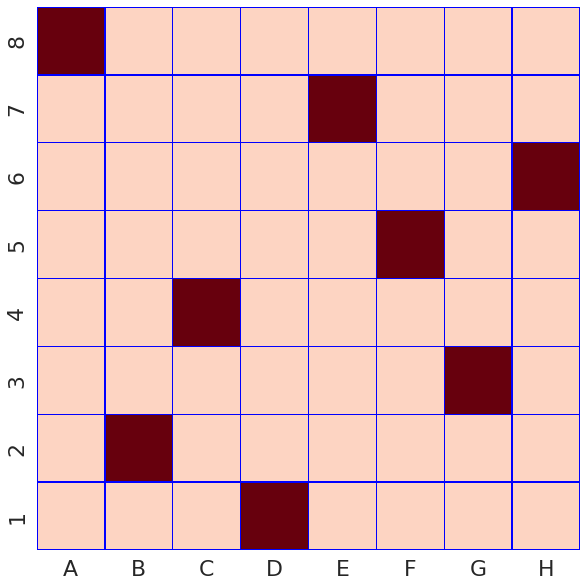

In [ ]:
plot(grid)